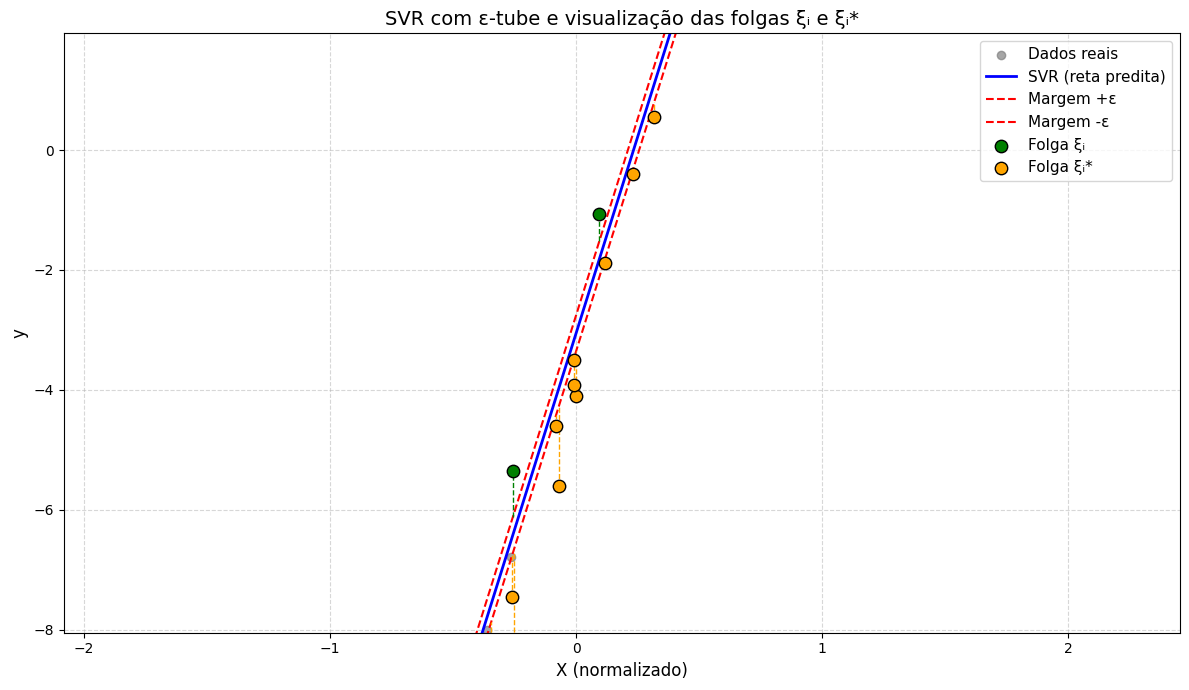

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


X, y = make_regression(n_samples=50, n_features=1, noise=1, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

epsilon = 0.3
model = SVR(kernel='linear', epsilon=epsilon, C=10.0)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Cálculo das variáveis de folga
xi      = np.maximum(0, y - y_pred - epsilon)
xi_star = np.maximum(0, y_pred - y - epsilon)

sorted_idx = np.argsort(X_scaled.ravel())
X_sorted = X_scaled[sorted_idx].ravel()
y_pred_sorted = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(X_scaled, y, color='gray', label='Dados reais', alpha=0.7)
plt.plot(X_sorted, y_pred_sorted, color='blue', label='SVR (reta predita)', linewidth=2)

# Margens ε
plt.plot(X_sorted, y_pred_sorted + epsilon, 'r--', label='Margem +ε')
plt.plot(X_sorted, y_pred_sorted - epsilon, 'r--', label='Margem -ε')

# Pontos com folga
outliers_up = (xi > 0)
outliers_down = (xi_star > 0)

plt.scatter(X_scaled[outliers_up], y[outliers_up], color='green', edgecolor='black', s=80, zorder=5, label='Folga ξᵢ')
plt.scatter(X_scaled[outliers_down], y[outliers_down], color='orange', edgecolor='black', s=80, zorder=5, label='Folga ξᵢ*')

for i in np.where(outliers_up)[0]:
    plt.plot([X_scaled[i], X_scaled[i]], [y_pred[i] + epsilon, y[i]], 'g--', linewidth=1)

for i in np.where(outliers_down)[0]:
    plt.plot([X_scaled[i], X_scaled[i]], [y[i], y_pred[i] - epsilon], 'orange', linestyle='--', linewidth=1)

y_center = np.mean(y_pred)
plt.ylim(y_center - 5, y_center + 5)

plt.title('SVR com ε-tube e visualização das folgas ξᵢ e ξᵢ*', fontsize=14)
plt.xlabel('X (normalizado)', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


As variáveis de folga medem a distância entre um ponto e o tubo, ou seja, o quanto uma prediçao está fora do intervalo de tolerância definido por epsilon. Elas só são diferentes de zero quando a predição excede o tubo. Na função de custo, as folgas entram como penalidades adicionais, quanto maiore foram, maior será o custo total.